In [1]:
from pathlib import Path
from tqdm import tqdm
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "filtered-brain-tumors-shortened")
image_dict = json.load(open(os.path.join(data_path, 'image_dict.json'), 'r'))
print(*image_dict.keys(), sep=', ')

Astrocitoma, Carcinoma, Glioblastoma, Meningioma, Neurocitoma, Oligodendroglioma, Papiloma, _NORMAL


### Plot one image from each class:

/tmp/ipykernel_212867/3719659605.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


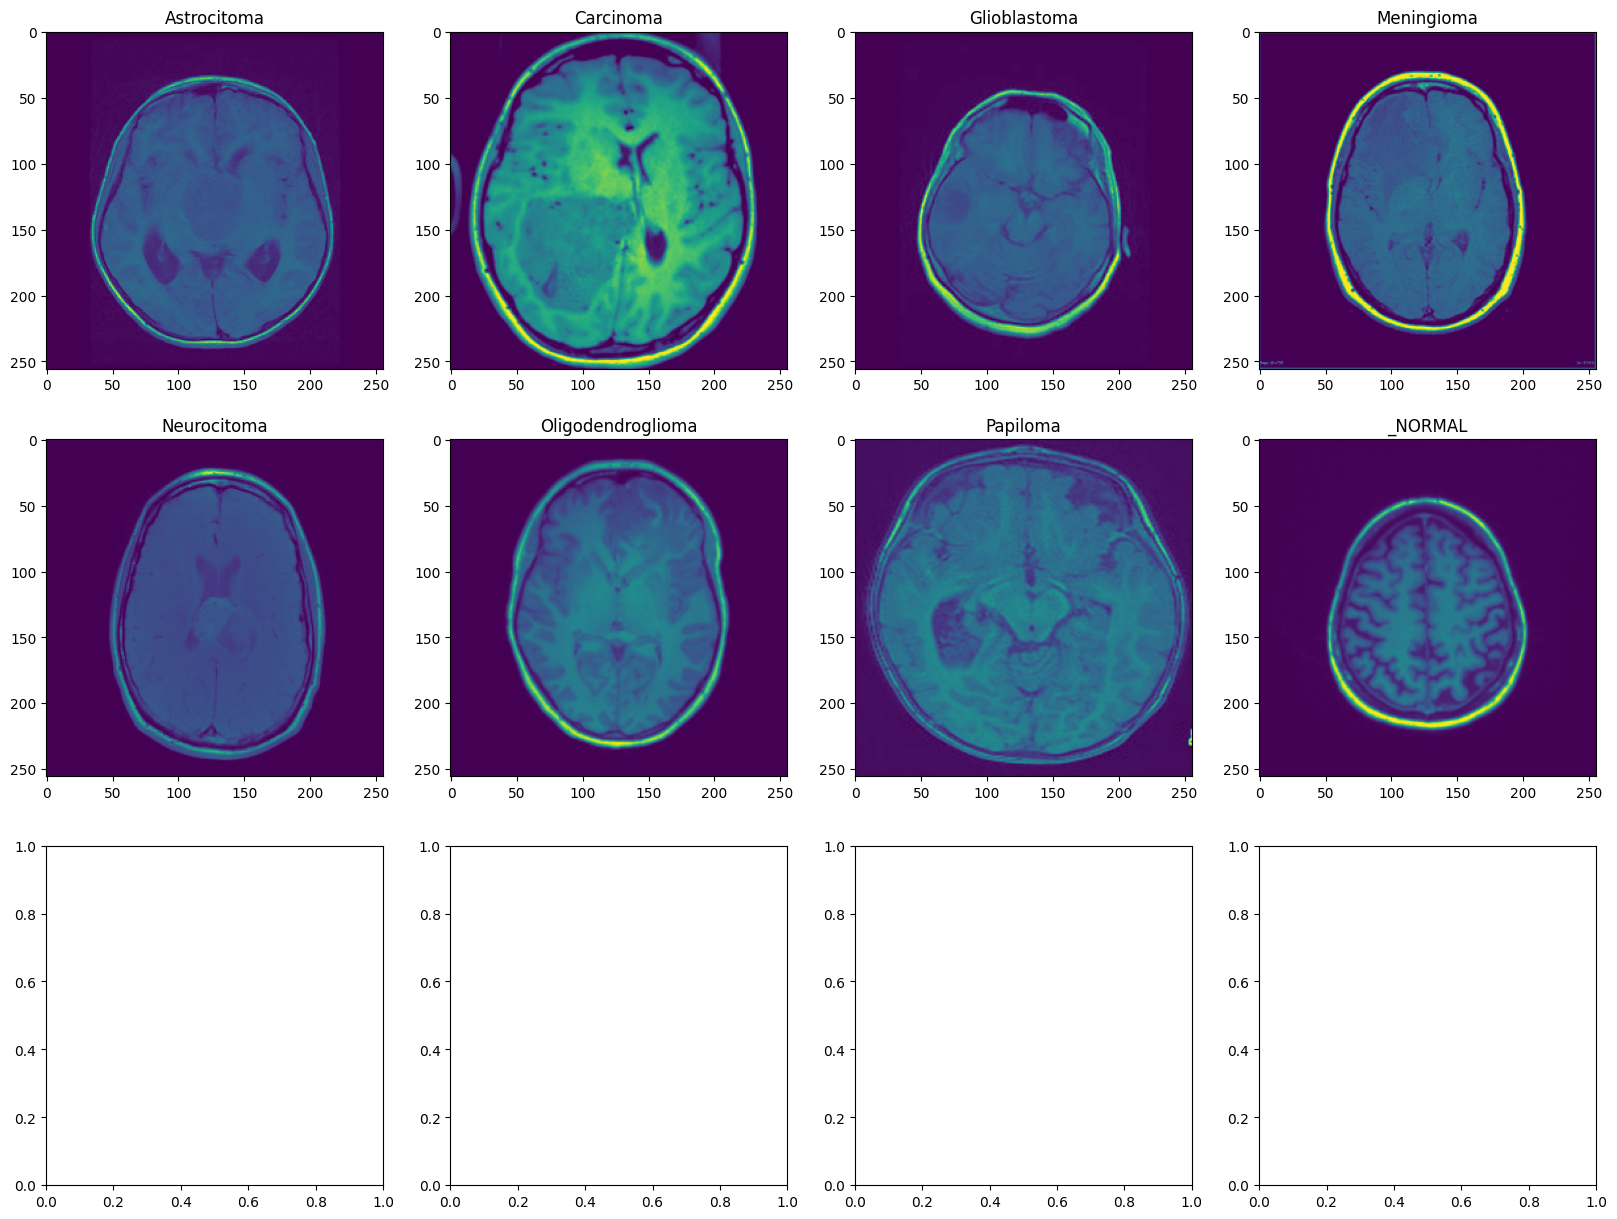

In [3]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
for i in range(len(image_dict.keys())):
    tumor_type = list(image_dict.keys())[i]
    image_path = os.path.join(data_path, image_dict[tumor_type][0])
    if not os.path.exists(image_path):
        print(image_path)
        break
    image = cv2.imread(image_path, 0)
    x, y = (int(i%4), int(i/4))
    ax[y, x].imshow(image)
    ax[y, x].title.set_text(tumor_type)
fig.show()
fig.savefig('each_class_image.png')

### Plot pixel distribution of each class

/tmp/ipykernel_212867/836675987.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


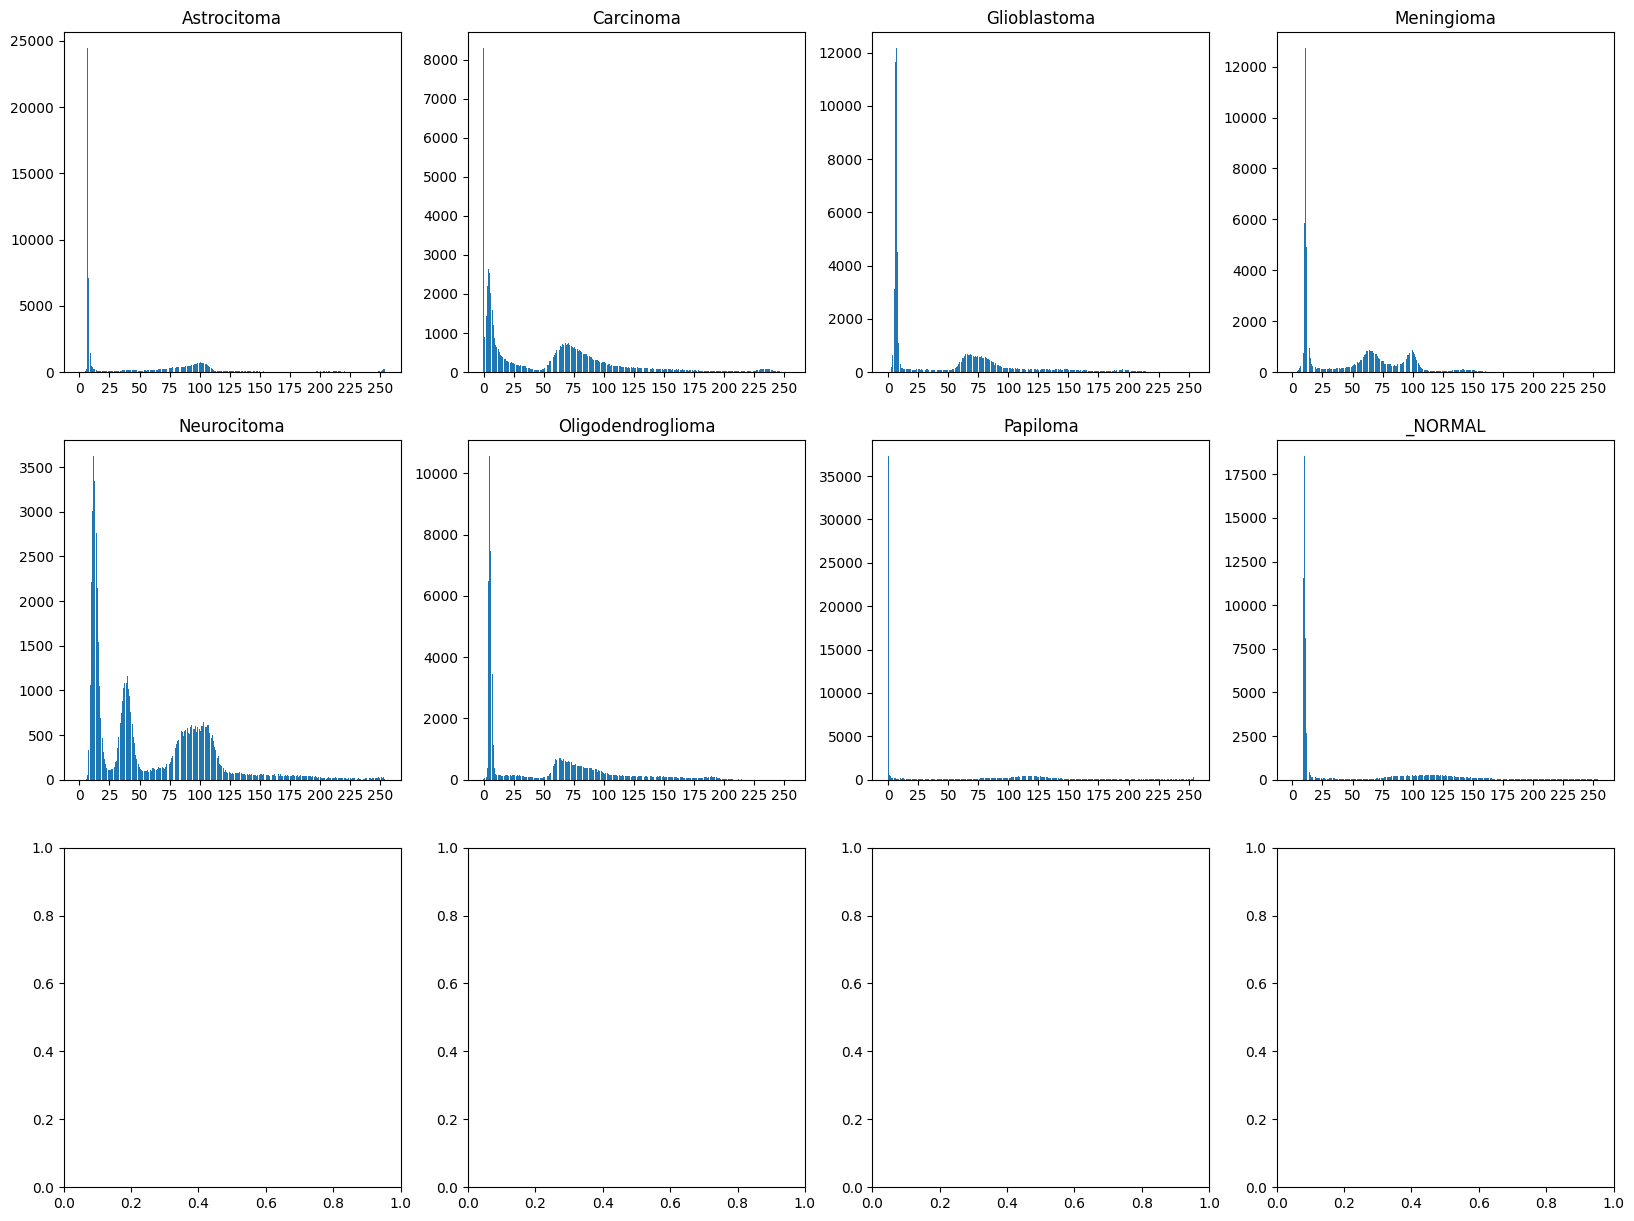

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
for i in range(len(image_dict.keys())):
    tumor_type = list(image_dict.keys())[i]
    count = np.zeros(256)
    for image_name in image_dict[tumor_type]:
        image_path = os.path.join(data_path, image_name)
        image = cv2.imread(image_path, 0)
        hist = np.histogram(image, bins=256, range=[0, 255])
        count = hist[0]
    bins = hist[1]
    fig = plt.figure()
    x, y = (int(i%4), int(i/4))
    ax[y, x].bar(bins[:-1], count)
    ax[y, x].title.set_text(tumor_type)
    ax[y, x].set_xticks(range(0, 256, 25))
fig.savefig('each_class_histogram.png', dpi=150)
fig.show()